# Julia 基礎圖表繪製: Gadfly 一維資料圖表

本範例需要使用到的套件有 RDatasets、Gadfly、Cairo、Fontconfig，請在執行以下範例前先安裝。

```
] add RDatasets
] add Gadfly
] add Cairo
] add Fontconfig
```

In [4]:
using Pkg

In [5]:
Pkg.add("RDatasets")
Pkg.add("Gadfly")
Pkg.add("Cairo")
Pkg.add("Fontconfig")

   Updating registry at `C:\Users\Acer\.julia\registries\General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  99.9 %2 %5 %                                       ]  2.0 % [==>                                      ]  2.5 %]  3.1 % [==>                                      ]  3.7 %                                      ]  3.8 %4.9 %===>                                     ]  6.0 %7.3 %>                                    ]  7.5 % [====>                                    ]  8.1 %                                    ]  9.0 %>                                    ]  9.3 %0 % [=====>                                   ]  11.6 % %.6 %14.3 %]  15.0 %Fetching: [=======>                                 ]  15.4 %                                 ]  15.9 %>                                 ]  16.3 % % [========>                                ]  18.9 %.5 % [========>                                ]  19.9 %.2 %.5 %>                               ]  21.0 %                               ]  21.4 %>                               ]  21.9 %>                       

  Resolving package versions...
  Installed┌ Info: Replacing symlinks in tarball by their source files ...
│ "JuliaData-RData.jl-820d9bf\\docs\\src\\LICENSE.md" => "JuliaData-RData.jl-820d9bf\\docs\\src\\../../LICENSE.md"
│ "JuliaData-RData.jl-820d9bf\\docs\\src\\NEWS.md" => "JuliaData-RData.jl-820d9bf\\docs\\src\\../../NEWS.md"
└ @ Pkg.PlatformEngines D:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.4\Pkg\src\PlatformEngines.jl:1022
 XML2_jll ─────────── v2.9.9+4
  Installed CodecZlib ────────── v0.6.0
  Installed ExprTools ────────── v0.1.1
  Installed FileIO ───────────── v1.3.0
  Installed RData ────────────── v0.7.1
  Installed TranscodingStreams ─ v0.9.5
  Installed TimeZones ────────── v1.2.0
  Installed RecipesBase ──────── v1.0.1
  Installed Zlib_jll ─────────── v1.2.11+10
  Installed Libiconv_jll ─────── v1.16.0+2
  Installed Requires ─────────── v1.0.1
  Installed Mocking ──────────── v0.7.1
  Installed EzXML ────────────── v1.1.0
  Installed RDatasets ──────

  [442fdcdd] + Measures v0.3.1
  [e89f7d12] + Media v0.5.0
  [d41bc354] + NLSolversBase v7.6.1
  [77ba4419] + NaNMath v0.3.3
  [6fe1bfb0] + OffsetArrays v1.0.4
  [4536629a] + OpenBLAS_jll v0.3.9+4
  [429524aa] + Optim v0.20.1
  [90014a1f] + PDMats v0.9.12
  [d96e819e] + Parameters v0.12.1
  [85a6dd25] + PositiveFactorizations v0.2.3
  [1fd47b50] + QuadGK v2.3.1
  [c84ed2f1] + Ratios v0.4.0
  [79098fc4] + Rmath v0.6.1
  [f50d1b31] + Rmath_jll v0.2.2+0
  [992d4aef] + Showoff v0.3.1
  [276daf66] ↑ SpecialFunctions v0.9.0 ⇒ v0.10.3
  [90137ffa] + StaticArrays v0.12.3
  [2913bbd2] + StatsBase v0.32.2
  [4c63d2b9] + StatsFuns v0.9.5
  [3a884ed6] + UnPack v1.0.1
  [efce3f68] + WoodburyMatrices v0.5.2
  [9abbd945] + Profile 
  [4607b0f0] + SuiteSparse 
   Building FFTW ─→ `C:\Users\Acer\.julia\packages\FFTW\5DZuu\deps\build.log`
   Building DecFP → `C:\Users\Acer\.julia\packages\DecFP\3jJW7\deps\build.log`
  Resolving package versions...
  Installed XSLT_jll ────────────────── v1.1.33+2
  Inst

http://gadflyjl.org/stable/man/backends/#

## 讀取資料

In [6]:
using RDatasets
iris = dataset("datasets", "iris")

┌ Info: Precompiling RDatasets [ce6b1742-4840-55fa-b093-852dadbb1d8b]
└ @ Base loading.jl:1260


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


## 直方圖

In [7]:
using Gadfly
import Cairo, Fontconfig  # 要儲存成 png 格式需要

┌ Info: Precompiling Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004]
└ @ Base loading.jl:1260
┌ Info: Precompiling Cairo [159f3aea-2a34-519c-b102-8c37f9878175]
└ @ Base loading.jl:1260
┌ Info: Precompiling Fontconfig [186bb1d3-e1f7-5a2c-a377-96d770f13627]
└ @ Base loading.jl:1260


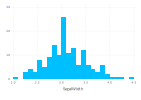

In [8]:
p = plot(iris, x="SepalWidth", Geom.histogram)

In [9]:
draw(PNG("histogram.png", 12cm, 9cm), p)

## 條狀圖

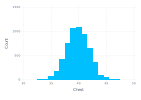

In [10]:
chest = dataset("HistData", "ChestSizes")
p = plot(chest, x="Chest", y="Count", Geom.bar)

In [11]:
draw(PNG("bar.png", 12cm, 9cm), p)

## 線圖

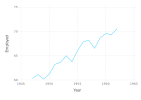

In [12]:
longley = dataset("datasets", "longley")
p = plot(longley, x="Year", y="Employed", Geom.line)

In [13]:
draw(PNG("line.png", 12cm, 9cm), p)

## 盒狀圖

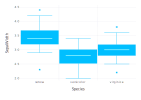

In [14]:
p = plot(iris, x="Species", y="SepalWidth", Geom.boxplot)

In [15]:
draw(PNG("boxplot.png", 12cm, 9cm), p)

## Violin plot

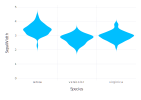

In [16]:
p = plot(iris, x="Species", y="SepalWidth", Geom.violin)

In [17]:
draw(PNG("violin.png", 12cm, 9cm), p)